I created this jupyter notebook as part of the Fastai course. We were asked to pick a certain topic/concept used in deep learning and then research about it to reinforce our learning. I thought it's worthwhile to dig into a fundamental concept which is why I chose the topic of Gradient Descent. Here is my approach to reinforce my knowledge.
1. Understand the fundamentals of Gradient Descent. (what does it do)
2. Research different variants of Gradient Descent.
3. Implement different variants of Gradient Descent and compare their performances.

Gradient Descent is an optimization method commonly used in neural networks. It is an iterative optimization algorithm for finding a minimum of a function.

The concepts will be illustrated with a sample task of line-fitting.The goal of linear regression is to fit a line to a set of points.

In [60]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

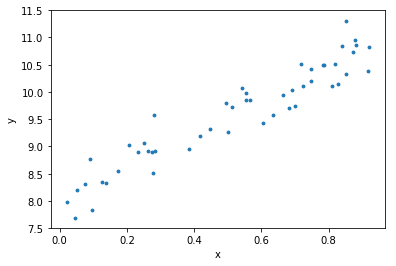

In [61]:
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [62]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

In [63]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [64]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.33270362389529

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

# Full Batch Gradient Descent

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [65]:
%matplotlib inline
from fastai.learner import *

In [66]:
# generate some data
x, y = gen_fake_data(10000, 3., 8.)
x_1 = x ##retaining the values as numpy in a separate variable. (to be used for python version of SGD)
y_1 = y
x.shape, y.shape

((10000,), (10000,))

In [67]:
x,y = V(x),V(y)

In [68]:
# Create random weights a and b, and wrap them in Variables.
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a,b

(Variable containing:
 -0.4521
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
 -0.1193
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [69]:
learning_rate = 1e-3
gd_loss = []
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
    gd_loss.append(loss.data[0])
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

97.93350219726562
0.7298593521118164
0.11548963934183121
0.10623794794082642
0.10201830416917801
0.09879302978515625
0.09631378203630447
0.09440761059522629
0.0929422602057457
0.09181594103574753


# SGD

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**.  SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

In [70]:
import random

In [71]:
def get_minibatch(X, y, minibatch_size):
    minibatches = []
    idx = np.random.choice(np.arange(len(X)),minibatch_size, replace=False)
    
  
    X_mini = X[idx]
    y_mini = y[idx]
    #for i in range(0, X.shape[0], minibatch_size):
    #    X_mini = X[i:i + minibatch_size]
    #    y_mini = y[i:i + minibatch_size]

    minibatches.append((X_mini, y_mini))

    return X_mini, y_mini

In [72]:
a_guess,b_guess = -1., 1.
lr=0.01
sgd_loss = []
def upd_SGD(x_2,y_2):
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x_2)
    dydb = 2 * (y_pred - y_2)
    dyda = x_2*dydb
    loss = mse_loss(a_guess, b_guess, x_2,y_2)
    sgd_loss.append(loss)
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [73]:
for i in range(10000):
    x_2, y_2 = get_minibatch(x_1, y_1, 256)
    upd_SGD(x_2,y_2)

In [74]:
sgd_loss

[82.29409377312112,
 77.84710099353683,
 76.0521047335703,
 69.99606651859405,
 67.3195215193191,
 64.86204928070394,
 63.308573087585295,
 59.521767709073515,
 55.015312331842125,
 50.37102700809923,
 48.18718713717749,
 46.70421001754197,
 44.93260369392664,
 42.28471120794864,
 40.86680439390208,
 37.144107416358565,
 36.84124716638205,
 34.45157242362171,
 32.357177770750866,
 30.12391069258435,
 29.67853434246652,
 28.546806241910048,
 26.13151412886578,
 25.22549664287901,
 24.463014541265586,
 22.74358005368391,
 21.477568877518564,
 20.954812812323347,
 19.625043519509312,
 18.747199325722413,
 17.743518713562608,
 17.324891213978713,
 15.698152445806004,
 15.058748557774013,
 14.523175385186455,
 13.663603031067613,
 13.061448084673085,
 12.221477285065236,
 11.33018240346409,
 11.063383237343958,
 10.388104890490233,
 9.877682481893661,
 9.337898174420953,
 9.300904583132274,
 8.752991269981333,
 8.360293880483345,
 7.920356087123678,
 7.070363484922102,
 6.865776402527137,
 

# SGD + Momentum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations.  As a result, we gain faster convergence and reduced oscillation.

In [75]:
# Create random weights a and b, and wrap them in Variables.
a2 = V(np.random.randn(1), requires_grad=True)
b2 = V(np.random.randn(1), requires_grad=True)
learning_rate = 1e-2
beta = 0.9
v_a2 = 0
v_b2 = 0


sgd_momentum_loss = []
for t in range(10000):
    x_2, y_2 = get_minibatch(x_1, y_1, 256)
    x, y = V(x_2), V(y_2)
    loss = mse_loss(a2,b2,x,y)

    if t % 1000 == 0: print(loss.data[0])
    sgd_momentum_loss.append(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()    
    
    params = [a2, b2]
    
    v_a2 = beta*v_a2 + (1-beta)*a2.grad.data
    v_b2 = beta*v_b2 + (1-beta)*b2.grad.data
    
    a2.data -= learning_rate * v_a2
    b2.data -= learning_rate * v_b2
    
    a2.grad.data.zero_()
    b2.grad.data.zero_()

70.24541473388672
0.09249190986156464
0.09094815701246262
0.09332834929227829
0.08792785555124283
0.0957421138882637
0.08296823501586914
0.07762821018695831
0.08447223156690598
0.08215447515249252


In [76]:
sgd_momentum_loss

[70.24541473388672,
 69.21488189697266,
 69.32743072509766,
 68.68953704833984,
 67.6155776977539,
 65.27239227294922,
 63.854793548583984,
 61.98478317260742,
 59.486167907714844,
 58.82516098022461,
 56.00638961791992,
 55.7291374206543,
 52.336524963378906,
 49.50551986694336,
 49.27327346801758,
 46.46482467651367,
 43.61220169067383,
 42.87112808227539,
 40.537696838378906,
 38.87057113647461,
 36.66151428222656,
 34.592979431152344,
 31.904756546020508,
 30.684890747070312,
 29.113937377929688,
 26.71634292602539,
 25.70807647705078,
 24.1545467376709,
 22.807540893554688,
 21.60883903503418,
 20.412839889526367,
 19.118547439575195,
 18.228763580322266,
 17.077573776245117,
 15.930752754211426,
 14.499314308166504,
 13.569449424743652,
 12.938182830810547,
 12.258871078491211,
 11.68341064453125,
 10.537345886230469,
 9.98858642578125,
 9.168559074401855,
 8.712540626525879,
 8.134803771972656,
 7.546671390533447,
 7.278819561004639,
 6.64499044418335,
 6.129179000854492,
 5.889

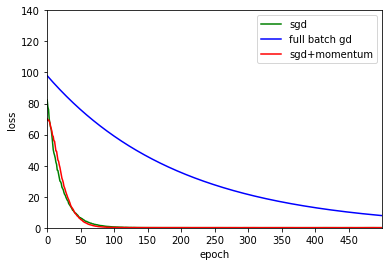

In [77]:
##compare performances
plt.plot(sgd_loss, 'g-', label='sgd')
plt.plot(gd_loss, 'b-', label='full batch gd')
plt.plot(sgd_momentum_loss, 'r-', label='sgd+momentum')
plt.axis([0, 500, 0, 140])
plt.xticks(np.arange(0, 500, 50))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

SGD performs much better than the full batch gradient descent as it is able to find the minimum much faster. However, there is not much difference between the performance of SGD and SGD+Momentum in this particular example.

References:
1. Fastai - lesson6-sgd.ipynb (for the full batch gradient descent source code)
2. Blogpost: http://ruder.io/optimizing-gradient-descent/ (for psuedo codes and useful equations)
3. Video: https://www.youtube.com/watch?v=k8fTYJPd3_I&t=185s (helpful video for deeper intuition SGD+momentum)